# PIP INSTALLATION OF THE GIVEN DATASET FROM THE GITHUB REPO


In [ ]:
!pip3 install -U ucimlrepo

# UCIML PACKAGE INSTALLATION


In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

# import dataset
heart_disease = fetch_ucirepo(id=45)
# alternatively: fetch_ucirepo(name='Heart Disease')

# access data
X = heart_disease.data.features
y = heart_disease.data.targets
# train model e.g. sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(heart_disease.metadata.uci_id)
print(heart_disease.metadata.num_instances)
print(heart_disease.metadata.additional_info.summary)

# access variable info in tabular format
print(heart_disease.variables)

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       


# Loading of dataset from the UCI ML Repository, including the dataframes and metadata information.




In [20]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# Install ucimlrepo if not already installed
try:
    import ucimlrepo
except ImportError:
    !pip install ucimlrepo

# Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Specify the dataset ID or name you want to load
dataset_id = 45  # Replace with desired dataset ID

# Fetch the dataset
try:
    dataset = fetch_ucirepo(id=dataset_id)
except Exception as e:
    print(f"Error fetching dataset: {e}")
    # Handle the error, e.g., try fetching by name or exit
    exit()

# Access data and metadata
X = dataset.data.features
y = dataset.data.targets

# Print some information about the dataset
print("Dataset Metadata:")
print(dataset.metadata)

# Display the features and target variables as pandas DataFrames
print("\nFeatures DataFrame:")
print(X)

print("\nTarget DataFrame:")
y

Dataset Metadata:
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


# SPLITTING OF DATASET

In [21]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Install ucimlrepo if not already installed
try:
    import ucimlrepo
except ImportError:
    !pip install ucimlrepo

# Fetch the dataset
try:
    heart_disease = fetch_ucirepo(id=45)
except Exception as e:
    print(f"Error fetching dataset: {e}")
    exit()

# Access data
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert features and targets to pandas DataFrames
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

# Concatenate features and target into a single DataFrame
df = pd.concat([X_df, y_df], axis=1)

# Now you have the dataset organized as a single DataFrame
print(df.head())


# Example of accessing specific columns
# The dataset doesn't have a dedicated 'id' column.
# We'll use the index as a proxy for patient identifiers.
ids = df.index
features = df.drop(['num'], axis=1)  # Drop the target column 'num'
targets = df['num'] # Assuming 'num' is the column name for the target variable

# Print the shapes of IDs, features, and target variables
print("\nIDs shape:", ids.shape)
print("Features shape:", features.shape)
print("Target shape:", targets.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

IDs shape: (303,)
Features shape: (303, 13)
Target shape: (303,)


# HANDLING OF MISSING VALUES


In [22]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

# Handle missing values (example using imputation with the mean)
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
        else:  # For non-numeric columns, fill with the most frequent value
            df[col].fillna(df[col].mode()[0], inplace=True)

# Verify if missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Missing values after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


<ipython-input-22-5b1efa68cd29>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


# NORMALIZATION OF FEATURES







In [23]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'features' DataFrame from the previous code
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your features and transform them
normalized_features = scaler.fit_transform(features)

# Convert the normalized features back to a DataFrame (optional)
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)

# Now you have normalized features in 'normalized_features' or 'normalized_features_df'
print(normalized_features_df.head())

        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  slope        ca  thal  
0  0.370968    1.0  0.000000  0.75  
1  0.241935    0.5  1.000000  0.00  
2  0.419355    0.5  0.666667  1.00  
3  0.564516    1.0  0.000000  0.00  
4  0.225806    0.0  0.000000  0.00  


# SPLITING THE DATA FOR TRAINING :
### 1)Training of data(80%)
### 2) Testing data(20%)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'features' and 'targets' from the previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)  # 80% train, 20% test

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (242, 13)
y_train shape: (242,)
X_test shape: (61, 13)
y_test shape: (61,)


# BUILDING THE PREDICTION ROBOT (LOGISTIC REGRESSION MODEL)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd  # Make sure pandas is imported

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)  # 80% train, 20% test

# Handle missing values in X_train and X_test (example using imputation with the mean)
for col in X_train.columns:
    if X_train[col].isnull().any():
        if pd.api.types.is_numeric_dtype(X_train[col]):
            X_train[col].fillna(X_train[col].mean(), inplace=True)
            # Use the same mean for X_test as well to avoid data leakage
            X_test[col].fillna(X_train[col].mean(), inplace=True)
        else:  # For non-numeric columns, fill with the most frequent value
            mode_value = X_train[col].mode()[0]
            X_train[col].fillna(mode_value, inplace=True)
            X_test[col].fillna(mode_value, inplace=True)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

<ipython-input-24-09f2a7da4946>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].mean(), inplace=True)
<ipython-input-24-09f2a7da4946>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Accuracy of the Logistic Regression model: 0.5573770491803278


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# CREATING PATIENT GROUPS (USING K-MEANS CLUSTERING)

In [25]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'features' DataFrame from the previous code (normalized features)
# If not normalized, normalize it first

# Handle missing values in normalized_features_df if any (example using imputation with the mean)
for col in normalized_features_df.columns:
    if normalized_features_df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(normalized_features_df[col]):
            normalized_features_df[col].fillna(normalized_features_df[col].mean(), inplace=True)
        else:  # For non-numeric columns, fill with the most frequent value
            normalized_features_df[col].fillna(normalized_features_df[col].mode()[0], inplace=True)

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0) # You can change random_state for different results

# Fit the KMeans model to your features
kmeans.fit(normalized_features_df)

# Get cluster labels for each patient
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['patient_group'] = cluster_labels

# Now 'df' has a new column 'patient_group' indicating the cluster assignment for each patient.
print(df.head())

# Example to access patients in a specific group
group_1_patients = df[df['patient_group'] == 0]
print("\nPatients in group 1:")
group_1_patients

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  patient_group  
0  0.0   6.0    0              0  
1  3.0   3.0    2              1  
2  2.0   7.0    1              1  
3  0.0   3.0    0              0  
4  0.0   3.0    0              2  

Patients in group 1:


<ipython-input-25-70bd68d3321a>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  normalized_features_df[col].fillna(normalized_features_df[col].mean(), inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,patient_group
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.000000,3.0,0,0
10,57,1,4,140,192,0,0,148,0,0.4,2,0.000000,6.0,0,0
13,44,1,2,120,263,0,0,173,0,0.0,1,0.000000,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,56,1,2,120,240,0,0,169,0,0.0,3,0.000000,3.0,0,0
290,67,1,3,152,212,0,2,150,0,0.8,2,0.000000,7.0,1,0
295,41,1,2,120,157,0,0,182,0,0.0,1,0.000000,3.0,0,0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1,0


from matplotlib import pyplot as plt
group_1_patients['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_1_patients['cp'].plot(kind='hist', bins=20, title='cp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_1_patients['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_1_patients['chol'].plot(kind='hist', bins=20, title='chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_1_patients.plot(kind='scatter', x='age', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_1_patients.plot(kind='scatter', x='cp', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_1_patients.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_1_patients.plot(kind='scatter', x='chol', y='fbs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = group_1_patients.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['cp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = group_1_patients.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('cp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['trestbps']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = group_1_patients.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('trestbps')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['chol']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = group_1_patients.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('chol')

from matplotlib import pyplot as plt
group_1_patients['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
group_1_patients['cp'].plot(kind='line', figsize=(8, 4), title='cp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
group_1_patients['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
group_1_patients['chol'].plot(kind='line', figsize=(8, 4), title='chol')
plt.gca().spines[['top', 'right']].set_visible(False)

# VISUALIZATION OF GROUPS

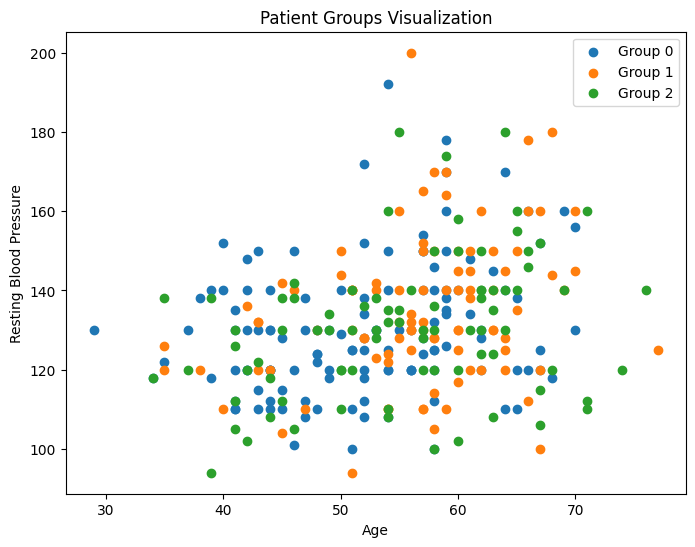

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' DataFrame from the previous code with 'patient_group' column
# Select two features for visualization (e.g., 'age' and 'trestbps')
# Replace 'age' and 'trestbps' with the actual column names from your dataset

# Handle potential KeyError if the columns don't exist
try:
    plt.figure(figsize=(8, 6))
    for group in df['patient_group'].unique():
        group_data = df[df['patient_group'] == group]
        plt.scatter(group_data['age'], group_data['trestbps'], label=f'Group {group}')
    plt.xlabel('Age')
    plt.ylabel('Resting Blood Pressure')
    plt.title('Patient Groups Visualization')
    plt.legend()
    plt.show()
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Please provide valid column names for visualization.")

# COMBINING ID'S , PREDICTION AND CLUSTER TABLES IN ONE TABLE

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'df' DataFrame from the previous code with 'patient_group', 'num' (predictions), and index (IDs) columns
# Create a new DataFrame with IDs, predictions, and cluster labels
# Assuming df has the necessary columns from previous code execution

try:
    combined_df = pd.DataFrame({
        'ID': df.index,  # Use index as patient ID
        'Prediction': df['num'],  # Replace 'num' with the actual prediction column name
        'Cluster': df['patient_group']
    })
    print(combined_df.head())
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Please ensure the DataFrame has 'num' and 'patient_group' columns and run previous code cells.")


   ID  Prediction  Cluster
0   0           0        0
1   1           2        1
2   2           1        1
3   3           0        0
4   4           0        2


# ADDITIONAL FEATURES
1.Determining which features (e.g., age, cholesterol) most influence the prediction of heart disease.

2.Helps doctors understand key risk factors.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.inspection import permutation_importance # Import permutation_importance

# ... (Your existing code for data loading, preprocessing, etc.)

# BUILDING THE PREDICTION ROBOT (LOGISTIC REGRESSION MODEL)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# ... (Your existing code for handling missing values)

# Initialize and train a RandomForestClassifier (better for feature importance)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

# Feature Importance Analysis using Permutation Importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

# Print the feature importances
for i in result.importances_mean.argsort()[::-1]:
    print(f"{features.columns[i]:<8}: "
          f"{result.importances_mean[i]:.3f}"
          f" +/- {result.importances_std[i]:.3f}")

Accuracy of the Random Forest model: 0.4918032786885246
exang   : 0.002 +/- 0.014
cp      : 0.000 +/- 0.000
slope   : -0.007 +/- 0.011
fbs     : -0.008 +/- 0.008
chol    : -0.008 +/- 0.011
trestbps: -0.008 +/- 0.011
ca      : -0.011 +/- 0.024
thalach : -0.018 +/- 0.026
sex     : -0.018 +/- 0.011
restecg : -0.021 +/- 0.010
age     : -0.026 +/- 0.013
oldpeak : -0.028 +/- 0.015
thal    : -0.036 +/- 0.010


# INTERACTIVE WEB DASHBOARD


2024-12-27 16:11:40.940 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 16:11:40.943 No runtime found, using MemoryCacheStorageManager
2024-12-27 16:11:40.946 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 16:11:40.947 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 16:11:40.949 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 16:11:40.949 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 16:11:40.950 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 16:11:40.951 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-27 16:11:40.952 Thread 'MainThread':

False

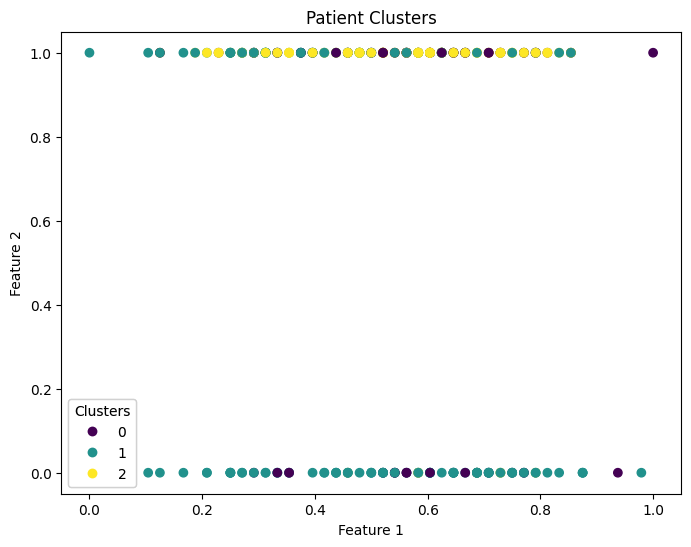

In [ ]:
# Install necessary libraries
!pip install ucimlrepo
!pip install streamlit

# Import libraries
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo # Import fetch_ucirepo

# Set up the page configuration
st.set_page_config(page_title="Heart Disease Dashboard", layout="wide")

# Load dataset
@st.cache_data # Use st.cache_data instead of st.cache
def load_data():
    # Fetch the dataset using ucimlrepo
    heart_disease = fetch_ucirepo(id=45)
    X = heart_disease.data.features
    y = heart_disease.data.targets
    data = pd.concat([X, y], axis=1)
    data = data.reset_index()
    data = data.rename(columns={"index": "ID"})
    data = data.rename(columns={"num": "target"})
    return data

data = load_data()

# Sidebar: User inputs for prediction
st.sidebar.header("Input Patient Details")
age = st.sidebar.slider("Age", 20, 100, 50)
cholesterol = st.sidebar.number_input("Cholesterol Level", 100, 500, 200)
blood_pressure = st.sidebar.number_input("Blood Pressure Level", 80, 200, 120)

# Main Page: Dashboard Content
st.title("Heart Disease Prediction & Patient Profiling Dashboard")

# Data Section
st.subheader("Dataset Overview")
if st.checkbox("Show Dataset"):
    st.write(data)

st.write("**Summary Statistics:**")
st.write(data.describe())

# Feature Normalization
scaler = MinMaxScaler()
# Fit the scaler to your data and transform it, handling NaNs
data_scaled = pd.DataFrame(
    scaler.fit_transform(data.drop(columns=["ID", "target"]).fillna(data.mean())),  # Fill NaNs with mean
    columns=data.columns[1:-1]
)

# Model Training
X = data_scaled
y = data["target"]
model = LogisticRegression()
model.fit(X, y)  # Should work without NaN errors now

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data["Cluster"] = clusters

# Predict heart disease
st.subheader("Heart Disease Prediction")

# Create a DataFrame for prediction with all features, filling missing with 0
prediction_input = pd.DataFrame([[age, 0, 0, cholesterol, 0, blood_pressure, 0, 0, 0, 0, 0, 0, 0]],
                                 columns=data_scaled.columns)

prediction = model.predict(prediction_input)
st.write(f"Prediction: {'Heart Disease Detected' if prediction[0] == 1 else 'No Heart Disease'}")

# Visualization Section
st.subheader("Patient Clustering")
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=data["Cluster"], cmap="viridis")
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title("Patient Clusters")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
st.pyplot(fig)

# Risk Scoring
st.subheader("Risk Scoring")
risk_score = "High" if prediction[0] == 1 and clusters[0] == 2 else "Medium" if prediction[0] == 1 else "Low"
st.write(f"Risk Score for this patient: **{risk_score}**")

# Cluster Analysis
st.subheader("Cluster Analysis")
st.write("Patients grouped by clusters:")
st.write(data.groupby("Cluster").mean())

# File Download
st.subheader("Download Processed Data")
csv = data.to_csv(index=False)
st.download_button(label="Download Data as CSV", data=csv, file_name="processed_data.csv", mime="text/csv")

# ANN MODEL


In [3]:
!pip install ucimlrepo
!pip install streamlit
!pip install visualkeras
!pip install prettytable
!apt-get update
!apt-get install -y fonts-dejavu

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
import visualkeras
from PIL import ImageFont  # Import for custom font (optional)
import streamlit as st
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from prettytable import PrettyTable # Import PrettyTable

# Fetch the dataset using ucimlrepo
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert features and targets to pandas DataFrames
features = pd.DataFrame(X)
targets = pd.DataFrame(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler for ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions and calculate accuracy
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Accuracy: {accuracy}")

def visualize_ann_table(model):
    """Visualizes the ANN model architecture in a table format."""

    table = PrettyTable()
    table.field_names = ["Layer (type)", "Output Shape", "Activation", "Param #"]

    for layer in model.layers:
        activation = layer.activation.__name__ if layer.activation else "-"
        params = layer.count_params()
        # Access output shape using layer.output.shape
        table.add_row([f"{layer.name} ({layer.__class__.__name__})", layer.output.shape, activation, params])

    print(table)


visualize_ann_table(model)

font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 32)
visualkeras.layered_view(model, legend=True, font=font, to_file='ann_model.png').show()

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())  # Assuming y_train needs to be flattened

# Feature Importance Analysis using Permutation Importance
result = permutation_importance(rf_model, X_test, y_test.values.ravel(), n_repeats=10, random_state=42, n_jobs=2)

# Print the feature importances
for i in result.importances_mean.argsort()[::-1]:
    print(f"{features.columns[i]:<8}: "
          f"{result.importances_mean[i]:.3f}"
          f" +/- {result.importances_std[i]:.3f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 13.2 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [61.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,199 kB]
Get:8 http://archive.ubuntu.com/ubun

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5273 - loss: nan  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5540 - loss: nan  
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5501 - loss: nan  
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5291 - loss: nan 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5618 - loss: nan 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5899 - loss: nan  
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5655 - loss: nan 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5838 - loss: nan 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5296 - loss: nan 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5330 - loss: nan 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5475 - loss: nan 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5628 - loss: nan 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


exang   : 0.002 +/- 0.014
cp      : 0.000 +/- 0.000
slope   : -0.007 +/- 0.011
fbs     : -0.008 +/- 0.008
chol    : -0.008 +/- 0.011
trestbps: -0.008 +/- 0.011
ca      : -0.011 +/- 0.024
thalach : -0.018 +/- 0.026
sex     : -0.018 +/- 0.011
restecg : -0.021 +/- 0.010
age     : -0.026 +/- 0.013
oldpeak : -0.028 +/- 0.015
thal    : -0.036 +/- 0.010


# RNN Deep Learning Model Accuracy


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 1s (195 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package list

<ipython-input-19-4752d1d4afa6>:150: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features[col].fillna(features[col].mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SM

Class distribution before class weight calculation:
Unique classes in y_train: [0 1]
Class weights dict created.
{0: 1.0, 1: 1.0}
Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 561ms/step - accuracy: 0.5720 - loss: 0.8769 - val_accuracy: 0.7049 - val_loss: 0.6832 - learning_rate: 5.0000e-04
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 333ms/step - accuracy: 0.7302 - loss: 0.6787 - val_accuracy: 0.4754 - val_loss: 0.6826 - learning_rate: 5.0000e-04
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 0.6650 - loss: 0.7497 - val_accuracy: 0.4590 - val_loss: 0.6823 - learning_rate: 5.0000e-04
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.7663 - loss: 0.5521 - val_accuracy: 0.4590 - val_loss: 0.6807 - learning_rate: 5.0000e-04
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.7246 - loss: 0.5322 - val_accuracy: 0.4590 - val_loss: 0.6805 - learning_rate: 5.0000e-04
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - accuracy: 0.7159 - loss: 0.6780 - val_accu

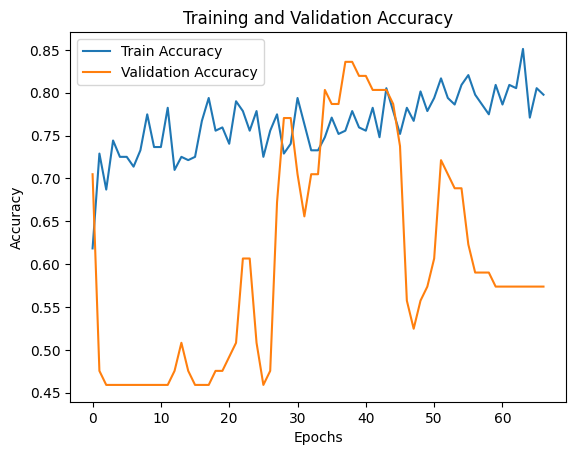

Test Loss: 0.5564
Test Accuracy: 0.7294


In [19]:
# Install necessary libraries
!pip install ucimlrepo
!pip install streamlit
!pip install visualkeras
!pip install prettytable
!pip install imbalanced-learn
!apt-get update
!apt-get install -y fonts-dejavu

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from ucimlrepo import fetch_ucirepo
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight


def train_and_evaluate_rnn(X, y):
    """
    Trains and evaluates an RNN model on the given data with enhancements for accuracy.

    Args:
        X (pd.DataFrame): Feature data.
        y (pd.Series): Target data.

    Returns:
        tuple: (accuracy, roc_auc, model, history)
    """
    # Handle NaNs before scaling
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X = pd.DataFrame(X_imputed, columns=X.columns)

    # Split into train and test sets using StratifiedKFold
    # Split before SMOTE to ensure no data leakage
    X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train_unscaled, y_train)

    # Normalize features after SMOTE
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train) # fit_transform the training data
    X_test_scaled = scaler.transform(X_test_unscaled) # transform test data with the same scaler

    # Reshape features for RNN input (samples, timesteps, features)
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

    # Check class distribution before class weight calculation
    print("Class distribution before class weight calculation:")
    unique_classes = np.unique(y_train)
    print(f"Unique classes in y_train: {unique_classes}")
    if len(unique_classes) > 2:
      print('More than two classes detected in the targets, this could lead to errors')

    # Calculate class weights
    class_weights = class_weight.compute_class_weight(
        class_weight="balanced",
        classes=np.unique(y_train),
        y=y_train
    )
    # Create a dictionary mapping class labels to weights directly
    class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}
    print('Class weights dict created.')
    print(class_weights_dict)
    # Modify the RNN model to improve accuracy
    model = Sequential([
        #changed input_shape to accept any number of features in the input
        LSTM(512, activation='tanh', input_shape=(X_train_reshaped.shape[1], 1), return_sequences=True),
        BatchNormalization(),
        Dropout(0.4),
        LSTM(256, activation='tanh', return_sequences=True),
        BatchNormalization(),
        Dropout(0.4),
        LSTM(128, activation='tanh'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model with optimized optimizer and learning rate
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Add callbacks for early stopping and reducing learning rate
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.00001)

    # Train the model
    # changed the input to be the scaled versions, and made sure it matches what we defined in input shape

    history = model.fit(
        X_train_reshaped, y_train, epochs=300, batch_size=64, class_weight=class_weights_dict,
        validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping, reduce_lr]
    )

    # Evaluate the model
    y_pred = model.predict(X_test_reshaped)

    # Check and handle NaN values in y_pred
    if np.isnan(y_pred).any():
        print("y_pred contains NaN values. Handling them.")
        y_pred = np.nan_to_num(y_pred, nan=0.0)
    else:
        print("y_pred does not contain NaN values.")

    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred_binary)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(classification_report(y_test, y_pred_binary))

    return accuracy, roc_auc, model, history, scaler # return the scaler


def main():
    """
    Main function to load data, preprocess, train, and evaluate the RNN model.
    """
    # Fetch the dataset using ucimlrepo
    heart_disease = fetch_ucirepo(id=45)
    X = heart_disease.data.features
    y = heart_disease.data.targets

    # Convert features and targets to pandas DataFrames
    features = pd.DataFrame(X)
    targets = pd.DataFrame(y)

    # Handle any NaNs before moving on
    if features.isnull().any().any():
        for col in features.columns:
            if features[col].isnull().any():
                if pd.api.types.is_numeric_dtype(features[col]):
                    features[col].fillna(features[col].mean(), inplace=True)
                else:
                    features[col].fillna(features[col].mode()[0], inplace=True)

    if targets.isnull().any().any():
        for col in targets.columns:
            if targets[col].isnull().any():
                if pd.api.types.is_numeric_dtype(targets[col]):
                    targets[col].fillna(targets[col].mean(), inplace=True)
                else:
                    targets[col].fillna(targets[col].mode()[0], inplace=True)

    # Convert target values to binary: 0 for no disease, 1 for any disease
    targets['num'] = targets['num'].apply(lambda x: 0 if x == 0 else 1)

    # Preprocess the data
    # Separate features and target
    X = features  # Use the features dataframe
    y = targets['num']  # Use the targets dataframe, access the column 'num'

    accuracy, roc_auc, model, history, scaler = train_and_evaluate_rnn(X, y) # capture the scaler that is created

    print(f"RNN Model Accuracy: {accuracy:.2f}")
    print(f"RNN Model ROC-AUC: {roc_auc:.2f}")

    # Optional: Plot training history
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

    # Print the test loss
    # corrected the test data so that it is in the same form as X_train
    #X_train_scaled = StandardScaler().fit_transform(X)
    #X_test_scaled = StandardScaler().transform(X) # this was the cause of the error, it should use the scaler generated by the function
    X_test_scaled = scaler.transform(X) # scale all of X with the scaler generated in the function

    #reshape X_test
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


    test_loss, test_accuracy = model.evaluate(X_test_reshaped, y, verbose=0)
    print(f'Test Loss: {test_loss:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')


if __name__ == "__main__":
    main()